In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,precision_score, roc_curve, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from xgboost import XGBClassifier, XGBRegressor

In [97]:
from sqlalchemy import create_engine

### Importing Data from SQL database

In [98]:
engine = create_engine(
    "mssql+pyodbc://DESKTOP-ALEGQ73\SQLEXPRESS/ML?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")
train = pd.read_sql("SELECT * FROM train", engine)
train

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_11308\2413514979.py:2: SyntaxWarning: invalid escape sequence '\S'
  "mssql+pyodbc://DESKTOP-ALEGQ73\SQLEXPRESS/ML?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes")


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,None,34.152199,-118.390999,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,None,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.002800,-118.239098,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,None,34.011101,-118.265297,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,None,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,None,34.295300,-118.459000,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,None,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,None,33.978699,-118.291801,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,5100 W ADAMS BL,None,34.033401,-118.352303,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,51.0,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19990,16900 ROSCOE BL,None,34.221199,-118.501099,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,None,IC,Invest Cont,Property Crimes
19991,1000 S SHENANDOAH ST,None,34.057098,-118.381500,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,42.0,M,H,102.0,SIDEWALK,NaN,None,IC,Invest Cont,Property Crimes
19992,300 W SEPULVEDA ST,None,33.745098,-118.283501,2020-06-10,2020-06-10,600.0,5.0,Harbor,558.0,...,76.0,F,H,501.0,SINGLE FAMILY DWELLING,NaN,None,IC,Invest Cont,Crimes against Public Order


In [99]:
test=pd.read_csv(r"C:\Users\user\Downloads\Crimecategorydata\test.csv")
test

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


### Data Cleaning and EDA

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               19994 non-null  object        
 1   Cross_Street           3448 non-null   object        
 2   Latitude               19994 non-null  float64       
 3   Longitude              19916 non-null  float64       
 4   Date_Reported          19994 non-null  datetime64[ns]
 5   Date_Occurred          19994 non-null  datetime64[ns]
 6   Time_Occurred          19994 non-null  float64       
 7   Area_ID                19994 non-null  float64       
 8   Area_Name              19994 non-null  object        
 9   Reporting_District_no  19994 non-null  float64       
 10  Part_1_2               19994 non-null  float64       
 11  Modus_Operandi         17253 non-null  object        
 12  Victim_Age             19994 non-null  float64       
 13  V

In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

In [102]:
#changing date data types
test.Date_Occurred=pd.to_datetime(test.Date_Occurred)

C:\Users\user\AppData\Local\Temp\ipykernel_11308\2891114524.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.Date_Occurred=pd.to_datetime(test.Date_Occurred)


In [103]:
test.Date_Occurred

0      2020-03-03
1      2020-04-25
2      2020-08-27
3      2020-12-03
4      2020-08-29
          ...    
4995   2020-06-04
4996   2020-11-25
4997   2020-11-21
4998   2020-02-29
4999   2020-10-09
Name: Date_Occurred, Length: 5000, dtype: datetime64[ns]

In [104]:
test.Date_Reported=pd.to_datetime(test.Date_Reported)

C:\Users\user\AppData\Local\Temp\ipykernel_11308\1527674809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.Date_Reported=pd.to_datetime(test.Date_Reported)


In [105]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Location               5000 non-null   object        
 1   Cross_Street           810 non-null    object        
 2   Latitude               5000 non-null   float64       
 3   Longitude              5000 non-null   float64       
 4   Date_Reported          5000 non-null   datetime64[ns]
 5   Date_Occurred          5000 non-null   datetime64[ns]
 6   Time_Occurred          5000 non-null   float64       
 7   Area_ID                5000 non-null   float64       
 8   Area_Name              5000 non-null   object        
 9   Reporting_District_no  5000 non-null   float64       
 10  Part 1-2               5000 non-null   float64       
 11  Modus_Operandi         4316 non-null   object        
 12  Victim_Age             5000 non-null   float64       
 13  Vic

In [ ]:
#renaming column
test.rename(columns={'Part 1-2':'Part_1_2'}, inplace=True)

In [106]:
#Checking nulls
train.isna().sum()

Location                     0
Cross_Street             16546
Latitude                     0
Longitude                   78
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part_1_2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12660
Weapon_Description       12660
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [107]:
#High % of nulls in few columns
train.Cross_Street.isna().sum()/train.Cross_Street.isna().count()

0.8275482644793438

In [108]:
train.Weapon_Used_Code.isna().sum()/train.Weapon_Used_Code.isna().count()

0.6331899569870961

In [109]:
train.Weapon_Description.isna().sum()/train.Weapon_Description.isna().count()

0.6331899569870961

In [110]:
#Dropping columns with very high null count
train.drop(columns='Cross_Street', inplace=True)
test.drop(columns='Cross_Street', inplace=True)

In [ ]:
#weapon related columns were not removed because of their importance in model prediction.

In [111]:
#checking value counts
for col in train.select_dtypes('object').columns:
     print(train[col].value_counts())  

Location
6TH                                        33
7TH                                        32
6TH                          ST            31
VERMONT                      AV            31
7TH                          ST            30
                                           ..
MCKINLEY                                    1
WADE                         ST             1
7500    WINNETKA                     AV     1
9600    ONEAL                        CT     1
DALTON                       AV             1
Name: count, Length: 12396, dtype: int64
Area_Name
77th Street    1345
Pacific        1156
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1013
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         909
Van Nuys        901
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     789
Devonshire      768
Hollenbeck      755
Foothill        734
Name: count, d

In [112]:
#Dropping categorical column with high value count
train.drop(columns=['Location', 'Modus_Operandi'], inplace=True)
test.drop(columns=['Location', 'Modus_Operandi'], inplace=True)

In [113]:
#Dropping other unnecessary columns
train.drop(columns=['Area_ID', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Status_Description'], inplace=True)
test.drop(columns=['Area_ID', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Status_Description'], inplace=True)

In [114]:
#Feature extraction from date columns
train['Day_occ']=train.Date_Occurred.dt.day
train['Day_rep']=train.Date_Reported.dt.day
train['Month_occ']=train.Date_Occurred.dt.month
train['Month_rep']=train.Date_Reported.dt.month

In [115]:
#imputing Categorical missing values
train.Weapon_Description.fillna("UNKNOWN WEAPON/OTHER WEAPON", inplace=True)
test.Weapon_Description.fillna("UNKNOWN WEAPON/OTHER WEAPON", inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11308\3763145196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Weapon_Description.fillna("UNKNOWN WEAPON/OTHER WEAPON", inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11308\3763145196.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [116]:
train.Victim_Descent.fillna(train.Victim_Descent.mode()[0], inplace=True)
test.Victim_Descent.fillna(train.Victim_Descent.mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11308\3029885712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Victim_Descent.fillna(train.Victim_Descent.mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11308\3029885712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [117]:
train.Victim_Sex.fillna(train.Victim_Sex.mode()[0], inplace=True)
test.Victim_Sex.fillna(train.Victim_Sex.mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11308\2061092162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Victim_Sex.fillna(train.Victim_Sex.mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11308\2061092162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [118]:
#using KNNImputer to impute missings in continuous column.
knn_imputer= KNNImputer()
train['Longitude']= knn_imputer.fit_transform(pd.DataFrame(train['Longitude']))

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19994 entries, 0 to 19993
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Latitude               19994 non-null  float64       
 1   Longitude              19994 non-null  float64       
 2   Date_Reported          19994 non-null  datetime64[ns]
 3   Date_Occurred          19994 non-null  datetime64[ns]
 4   Time_Occurred          19994 non-null  float64       
 5   Area_Name              19994 non-null  object        
 6   Reporting_District_no  19994 non-null  float64       
 7   Part_1_2               19994 non-null  float64       
 8   Victim_Age             19994 non-null  float64       
 9   Victim_Sex             19994 non-null  object        
 10  Victim_Descent         19994 non-null  object        
 11  Weapon_Description     19994 non-null  object        
 12  Status                 19994 non-null  object        
 13  C

In [120]:
#Checking Duplicates
train.duplicated().sum()

18

In [121]:
#Removing Duplicates
train.drop_duplicates(inplace=True, ignore_index=True)

In [122]:
#Treating negative records
train=train[train.Victim_Age>=0]

In [123]:
#Treating Time(24 hr format)
def fix_time_format_single(time):
    if pd.isnull(time):
        return "Invalid"
    time_str = str(int(time)).zfill(4)
    
    hour = int(time_str[:2])
    minute = int(time_str[2:])
    
    if 0 <= hour < 24 and 0 <= minute < 60:
        return time_str
    else:
        return "Invalid"


In [124]:
train.Time_Occurred.astype('object').apply(fix_time_format_single)
test.Time_Occurred.astype('object').apply(fix_time_format_single)

0       2000
1       1700
2       0900
3       2200
4       0130
        ... 
4995    2100
4996    1530
4997    2100
4998    2335
4999    0320
Name: Time_Occurred, Length: 5000, dtype: object

In [125]:
train.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.99])

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Reporting_District_no,Part_1_2,Victim_Age,Day_occ,Day_rep,Month_occ,Month_rep
count,19976.000000,19976.000000,19976,19976,19976.000000,19976.000000,19976.000000,19976.000000,19976.000000,19976.000000,19976.000000,19976.000000
mean,33.940530,-118.354628,2020-07-20 17:56:10.764917760,2020-06-28 20:23:05.502603008,1352.558470,1129.682469,1.418202,30.160142,15.567231,15.791700,6.432769,6.410042
min,0.000000,-118.663399,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,33.729201,-118.613527,2020-01-05 00:00:00,2020-01-03 00:00:00,1.000000,124.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
10%,33.952900,-118.507153,2020-02-08 00:00:00,2020-02-03 00:00:00,300.000000,279.000000,1.000000,0.000000,3.000000,4.000000,2.000000,2.000000
25%,34.009201,-118.429703,2020-04-06 00:00:00,2020-03-29 00:00:00,930.000000,632.000000,1.000000,12.000000,8.000000,8.000000,3.000000,3.000000
50%,34.058701,-118.324402,2020-07-09 00:00:00,2020-06-28 00:00:00,1430.000000,1162.000000,1.000000,31.000000,16.000000,16.000000,6.000000,6.000000
75%,34.165001,-118.275597,2020-10-10 00:00:00,2020-09-28 00:00:00,1900.000000,1622.000000,2.000000,46.000000,23.000000,23.000000,9.000000,9.000000
99%,34.302502,-118.191200,2022-06-03 12:00:00,2020-12-28 00:00:00,2330.000000,2173.000000,2.000000,78.000000,31.000000,31.000000,12.000000,12.000000
max,34.328098,-118.159302,2024-01-23 00:00:00,2020-12-31 00:00:00,2359.000000,2197.000000,2.000000,99.000000,31.000000,31.000000,12.000000,12.000000


In [126]:
train.select_dtypes('object').describe()

,Area_Name,Victim_Sex,Victim_Descent,Weapon_Description,Status,Crime_Category
count,19976,19976,19976,19976,19976,19976
unique,21,4,17,57,5,6
top,77th Street,M,H,UNKNOWN WEAPON/OTHER WEAPON,IC,Property Crimes
freq,1345,11151,8762,13435,15218,11653


In [127]:
#Splitting numerical & categorical variables
train_num= train.select_dtypes(['float64', 'int32'])
train_cat= train.select_dtypes('object')

In [128]:
#Outlier treatment
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc = q1 - 1.5 * iqr
    uc = q3 + 1.5 * iqr
    x=x.clip(lower=lc, upper=uc)
    return x

train_num=train_num.apply(outlier)

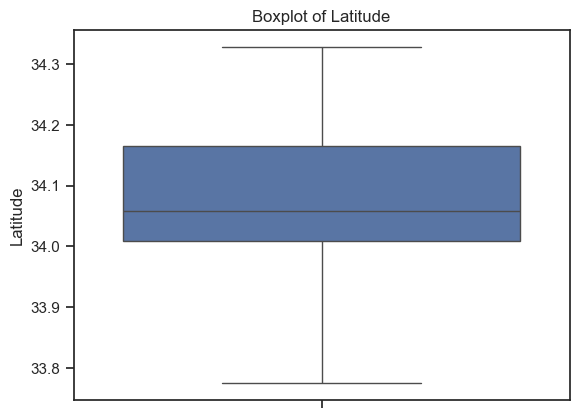

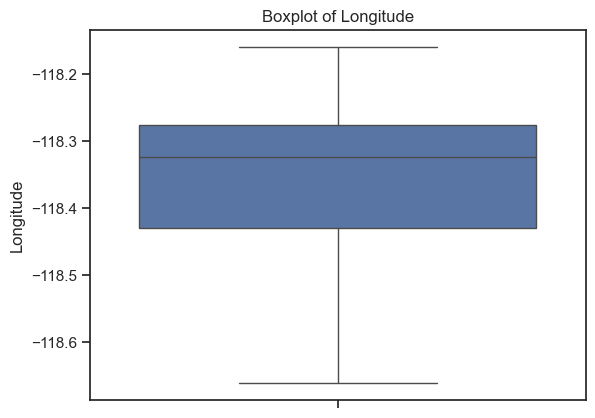

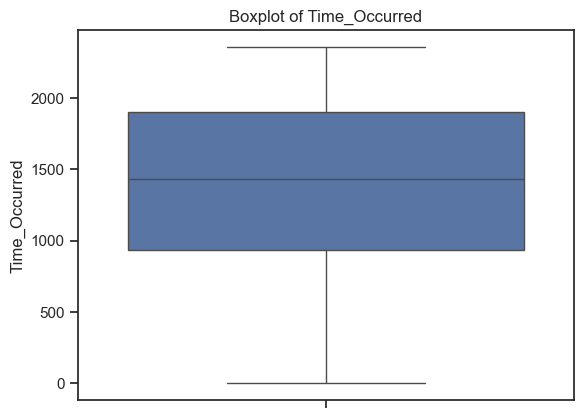

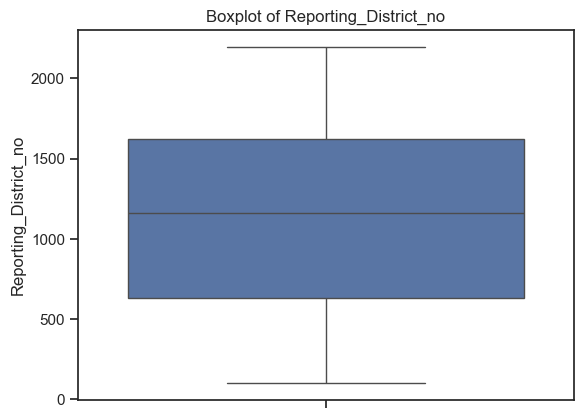

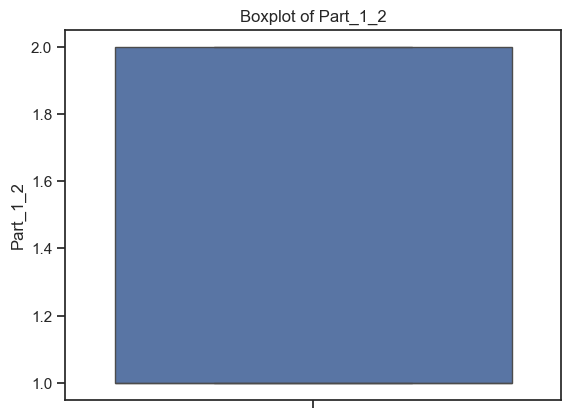

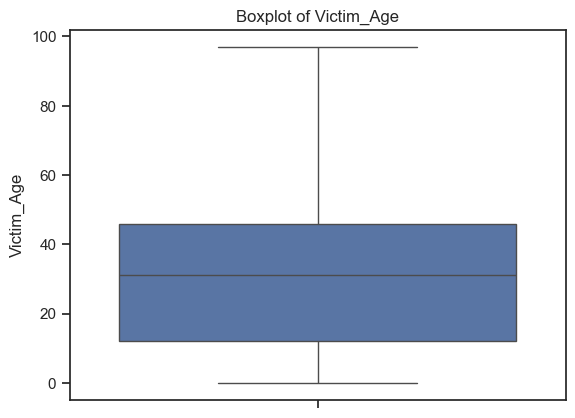

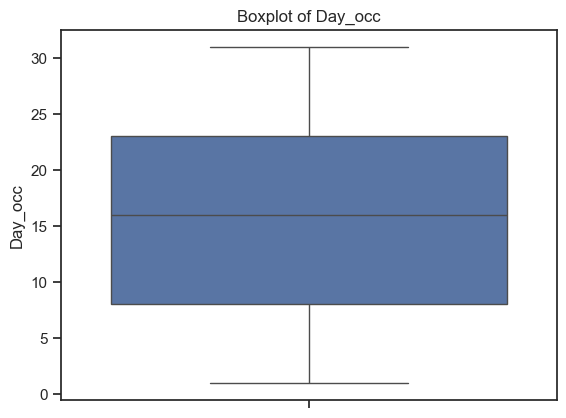

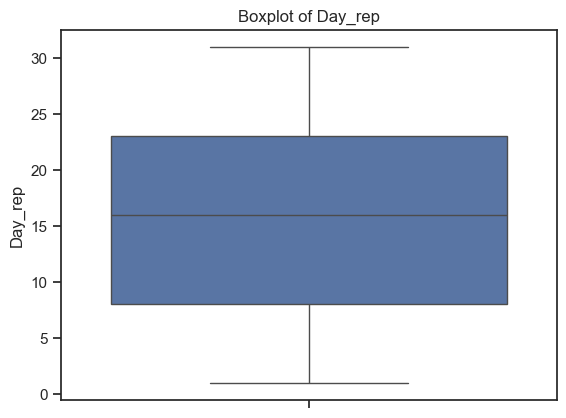

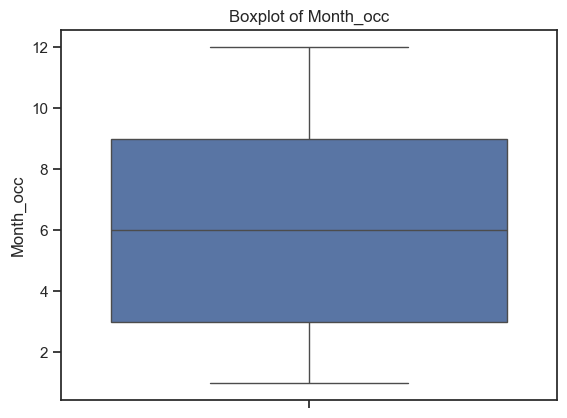

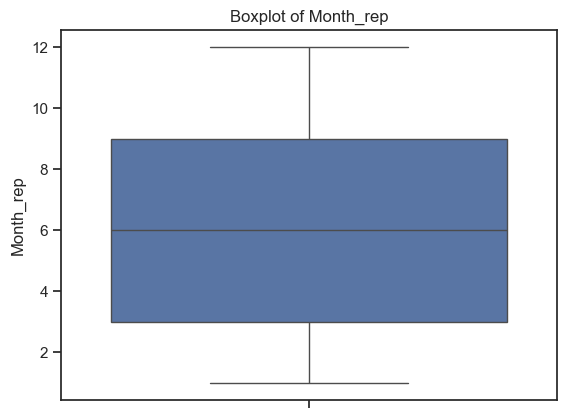

,Latitude,Longitude,Time_Occurred,Reporting_District_no,Part_1_2,Victim_Age,Day_occ,Day_rep,Month_occ,Month_rep
0,34.152199,-118.390999,1800.0,1563.0,1.0,75.0,6,9,3,3
1,34.002800,-118.239098,1345.0,1367.0,1.0,41.0,27,27,2,2
2,34.011101,-118.265297,605.0,1343.0,2.0,67.0,21,21,8,8
3,34.295300,-118.459000,1800.0,1924.0,1.0,61.0,6,8,11,11
4,33.978699,-118.291801,1130.0,1245.0,1.0,0.0,25,25,2,2
...,...,...,...,...,...,...,...,...,...,...
19971,34.033401,-118.352303,700.0,303.0,2.0,51.0,24,24,5,5
19972,34.221199,-118.501099,259.0,1008.0,1.0,0.0,25,25,12,12
19973,34.057098,-118.381500,1400.0,849.0,1.0,42.0,25,25,9,9
19974,33.775501,-118.283501,600.0,558.0,2.0,76.0,10,10,6,6


In [129]:
def demo(x):
    plt.title('Boxplot of '+ x.name)
    sns.boxplot(x)
    plt.show()
    return x

train_num.apply(demo)

In [130]:
#Merging all variables
train_new= pd.concat([train_num, train_cat], axis=1)

### Analysis & Visualizations

<Axes: xlabel='Victim_Sex', ylabel='Count'>

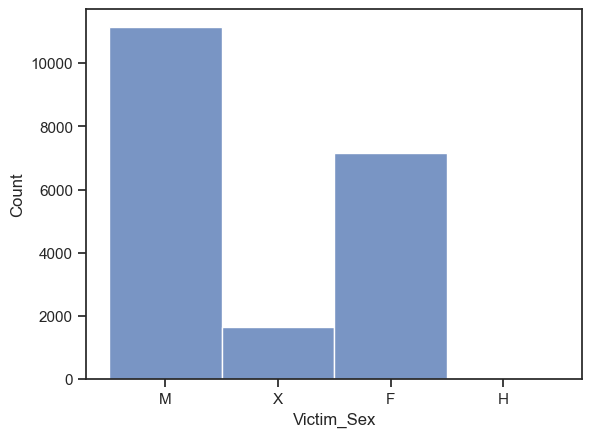

In [131]:
sns.histplot(train['Victim_Sex'])

<Axes: xlabel='Victim_Age', ylabel='Count'>

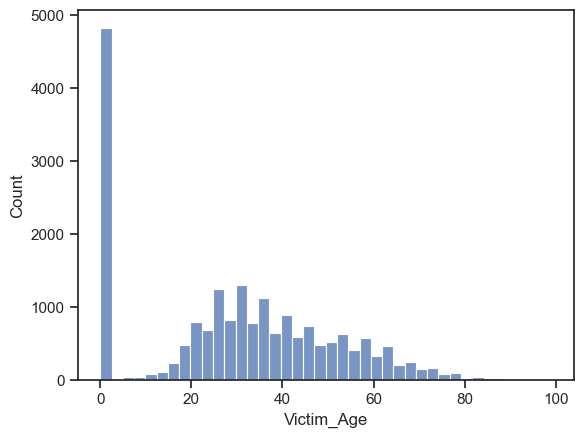

In [132]:
sns.histplot(train['Victim_Age'])

<Axes: xlabel='Victim_Descent', ylabel='Count'>

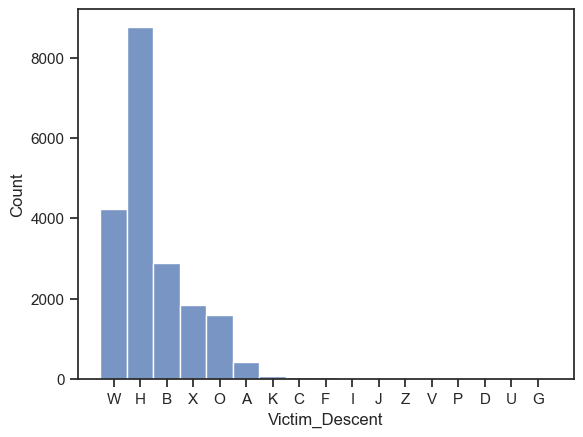

In [133]:
sns.histplot(train['Victim_Descent'])

In [135]:
#Splitting features and target variable
X=train_new[train_new.columns.difference(['Crime_Category'])]
y=train.Crime_Category

In [136]:
#Checking multi-collinearity
X.select_dtypes(['float', 'int32']).corr()

,Day_occ,Day_rep,Latitude,Longitude,Month_occ,Month_rep,Part_1_2,Reporting_District_no,Time_Occurred,Victim_Age
Day_occ,1.000000,0.735728,0.001197,-0.002016,0.006491,-0.003498,-0.015013,-0.005032,0.034563,-0.013521
Day_rep,0.735728,1.000000,-0.000560,-0.001678,-0.000942,-0.001683,0.006479,-0.008961,0.016970,-0.003701
Latitude,0.001197,-0.000560,1.000000,-0.571497,-0.018302,-0.020860,-0.004477,0.333720,0.014439,0.041209
Longitude,-0.002016,-0.001678,-0.571497,1.000000,-0.010729,-0.006540,-0.002050,-0.444430,-0.008344,-0.086268
Month_occ,0.006491,-0.000942,-0.018302,-0.010729,1.000000,0.903304,-0.010189,0.000720,0.002287,-0.021851
Month_rep,-0.003498,-0.001683,-0.020860,-0.006540,0.903304,1.000000,-0.007422,-0.004327,-0.001160,-0.029159
Part_1_2,-0.015013,0.006479,-0.004477,-0.002050,-0.010189,-0.007422,1.000000,-0.001981,-0.028778,0.186676
Reporting_District_no,-0.005032,-0.008961,0.333720,-0.444430,0.000720,-0.004327,-0.001981,1.000000,0.012781,0.028307
Time_Occurred,0.034563,0.016970,0.014439,-0.008344,0.002287,-0.001160,-0.028778,0.012781,1.000000,-0.018215
Victim_Age,-0.013521,-0.003701,0.041209,-0.086268,-0.021851,-0.029159,0.186676,0.028307,-0.018215,1.000000


<Axes: >

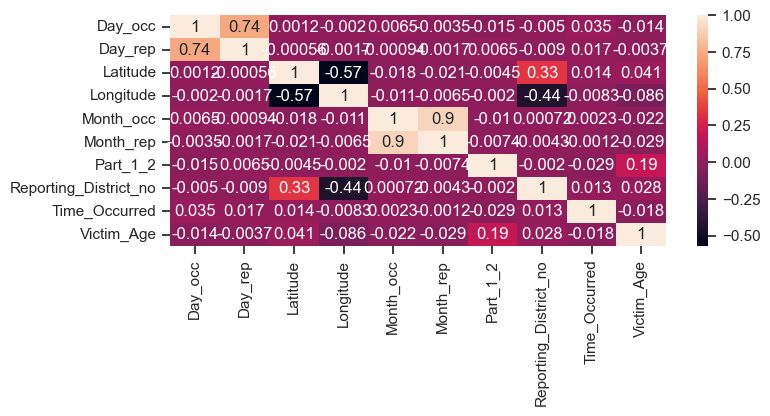

In [137]:
sns.set(style="ticks")
plt.figure(figsize=(8, 3))
sns.heatmap(X.select_dtypes(['float','int32']).corr(), annot=True)

In [140]:
#Dropping column with high multi-collinearity
X.drop(columns=['Reporting_District_no', 'Latitude', 'Longitude', 'Day_occ', 'Day_rep', 'Month_occ', 'Month_rep'], inplace=True)
test.drop(columns=['Reporting_District_no', 'Latitude', 'Longitude', 'Date_Occurred', 'Date_Reported'], inplace=True)

In [143]:
#to make test data columns consistent with train data.
test=test[X.columns]

### Data Pre-Processing

In [144]:
#Encoding target variable using Label Encoder.
label_encoder= LabelEncoder()
y_enc=label_encoder.fit_transform(y)

In [145]:
#Encoding features using One-Hot Encoder.
X_cat= X.select_dtypes('object')
X_num= X.select_dtypes(['float64', 'int32'])
test_cat= test.select_dtypes('object')
test_num= test.select_dtypes(['float64', 'int32'])

In [146]:
ohe= OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohen=ohe.fit_transform(X_cat)
ohe.get_feature_names_out()

array(['Area_Name_Central', 'Area_Name_Devonshire', 'Area_Name_Foothill',
       'Area_Name_Harbor', 'Area_Name_Hollenbeck', 'Area_Name_Hollywood',
       'Area_Name_Mission', 'Area_Name_N Hollywood', 'Area_Name_Newton',
       'Area_Name_Northeast', 'Area_Name_Olympic', 'Area_Name_Pacific',
       'Area_Name_Rampart', 'Area_Name_Southeast', 'Area_Name_Southwest',
       'Area_Name_Topanga', 'Area_Name_Van Nuys', 'Area_Name_West LA',
       'Area_Name_West Valley', 'Area_Name_Wilshire', 'Status_AO',
       'Status_IC', 'Status_JA', 'Status_JO', 'Victim_Descent_B',
       'Victim_Descent_C', 'Victim_Descent_D', 'Victim_Descent_F',
       'Victim_Descent_G', 'Victim_Descent_H', 'Victim_Descent_I',
       'Victim_Descent_J', 'Victim_Descent_K', 'Victim_Descent_O',
       'Victim_Descent_P', 'Victim_Descent_U', 'Victim_Descent_V',
       'Victim_Descent_W', 'Victim_Descent_X', 'Victim_Descent_Z',
       'Victim_Sex_H', 'Victim_Sex_M', 'Victim_Sex_X',
       'Weapon_Description_ASSAULT WEAP

In [147]:
test_ohe=ohe.transform(test_cat)

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [148]:
X_cat=pd.DataFrame(ohen,columns=ohe.get_feature_names_out())
test_cat=pd.DataFrame(test_ohe,columns=ohe.get_feature_names_out())

In [149]:
X_new=pd.concat([X_num,X_cat],axis=1)
test0=pd.concat([test_num,test_cat],axis=1)

In [150]:
#Feature elimination- SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X_new, y_enc)
X_selected = pd.DataFrame(X_selected, columns=X_new.columns[selector.get_support()])

In [151]:
test_selec=selector.transform(test0)
test_selec = pd.DataFrame(test_selec, columns=test0.columns[selector.get_support()])

In [152]:
X_selected

,Part_1_2,Victim_Age,Status_AO,Status_IC,Victim_Descent_B,Victim_Descent_H,Victim_Descent_X,Victim_Sex_M,Victim_Sex_X,Weapon_Description_BELT FLAILING INSTRUMENT/CHAIN,Weapon_Description_HAND GUN,"Weapon_Description_STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Weapon_Description_UNKNOWN FIREARM,Weapon_Description_UNKNOWN WEAPON/OTHER WEAPON,Weapon_Description_VERBAL THREAT
0,1.0,75.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,41.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.0,67.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,61.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,2.0,51.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19972,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19973,1.0,42.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19974,2.0,76.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [153]:
#Balancing the data- using SMOTE technique
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_selected, y_enc)

In [154]:
X_res.shape

(69918, 15)

In [155]:
y_res.shape

(69918,)

In [156]:
#Train-test split
X_train, X_val, y_train, y_val=train_test_split(X_res, y_res, test_size=0.3, random_state=37)

## RandomForest

In [157]:
#Hyperparameter tuning using RandomizedSearchCV
Grid= {'n_estimators': [50, 100, 120, 150],'max_depth':[2,4,6,8,10], 'min_samples_split': [50,100,200,400], 'min_samples_leaf': [50,100,200,400]}
grcv= RandomizedSearchCV(RandomForestClassifier(random_state=45), Grid, n_jobs=-1, cv=3)
grcv.fit(X_train, y_train)
grcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 200,
 'min_samples_leaf': 50,
 'max_depth': 8}

In [158]:
#tarining model
model0= RandomForestClassifier(n_estimators=100, min_samples_split=200, min_samples_leaf=50, max_depth=10)
model0= model0.fit(X_train, y_train)

In [160]:
#prediction on train data
rf_pred0=model0.predict(X_train)
accuracy_score(y_train, rf_pred0)

0.7941849536185689

In [159]:
#prediction on validation data
rf_pred=model0.predict(X_val)
rf_pred

array([5, 1, 3, ..., 3, 0, 1])

In [161]:
accuracy_score(y_val, rf_pred)  #hence there is no overfitting

0.7906655225019069

In [162]:
print(classification_report(y_val,rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3478
           1       0.83      0.52      0.64      3508
           2       0.62      0.90      0.73      3463
           3       0.72      0.74      0.73      3479
           4       0.96      0.75      0.84      3511
           5       0.82      0.85      0.84      3537

    accuracy                           0.79     20976
   macro avg       0.81      0.79      0.79     20976
weighted avg       0.81      0.79      0.79     20976



In [ ]:
#Now evaluate another model to get better accuracy.

## XgBoost

In [163]:
import xgboost

In [164]:
from xgboost import XGBClassifier

In [165]:
#training model
model1 = XGBClassifier(n_estimators=100, max_depth=10)
model1= model1.fit(X_train,y_train)
xg_pred = model1.predict(X_train) 
xg_pred0 = model1.predict(X_val)
xg_pred0

array([5, 0, 3, ..., 3, 0, 1], dtype=int64)

In [166]:
y_predictlabels= label_encoder.inverse_transform(xg_pred0)
print(y_predictlabels)

['Violent Crimes' 'Crimes against Persons' 'Other Crimes' ...
 'Other Crimes' 'Crimes against Persons' 'Crimes against Public Order']


In [167]:
accuracy_score(y_train, xg_pred)

0.9120183073842507

In [168]:
accuracy_score(y_val,xg_pred0)     #overfitting is negligible

0.8696128909229596

In [169]:
print(classification_report(y_val,xg_pred0))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3478
           1       0.85      0.73      0.78      3508
           2       0.76      0.89      0.82      3463
           3       0.83      0.94      0.88      3479
           4       0.93      0.80      0.86      3511
           5       0.90      0.88      0.89      3537

    accuracy                           0.87     20976
   macro avg       0.87      0.87      0.87     20976
weighted avg       0.87      0.87      0.87     20976



In [170]:
#Since xgboost model gave better accuracy, therefore, it was selected for test data prediction.
xg_pred_test=model1.predict(test_selec)
t=pd.DataFrame(xg_pred_test)

In [188]:
predicted_labels = label_encoder.inverse_transform(xg_pred_test.astype(int))

In [189]:
predicted_labels

array(['Violent Crimes', 'Property Crimes', 'Property Crimes', ...,
       'Violent Crimes', 'Property Crimes', 'Crimes against Public Order'],
      dtype=object)

In [171]:
t['ID']=t.index + 1

In [190]:
submission= pd.DataFrame({'ID':t['ID'], 'Crime_Category':predicted_labels})
submission.to_csv("C:\\Users\\user\\Downloads\\Crimecategorydata\\submission.csv", index=False)

In [187]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              5000 non-null   int64
 1   Crime_Category  5000 non-null   int32
dtypes: int32(1), int64(1)
memory usage: 58.7 KB


In [173]:
#Creating joblib file using serialization

In [176]:
model1.save_model("C:\\Users\\user\\Downloads\\Crimecategorydata\\xgb_model.json")

In [177]:
import joblib

bundle = {'model': model1,'encoder_y': label_encoder,'encoder_x': ohe,'selectkbest': selector}

joblib.dump(bundle, "C:\\Users\\user\\Downloads\\Crimecategorydata\\CrimeData.pkl")


['C:\\Users\\user\\Downloads\\Crimecategorydata\\CrimeData.pkl']

In [178]:
bundle

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, ...),
 'encoder_y': LabelEncoder(),
 'encoder_x': OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
 'selectkbest': SelectKBest(k=15)}

In [179]:
with open(r"C:\Users\user\Downloads\Crimecategorydata\model_bundle.pkl", "rb") as f:
    bundle = joblib.load(f)

# Check what’s inside
print("Bundle keys:", bundle.keys())

# Optional: Inspect individual components
model = bundle.get('model')
encoder_y = bundle.get('encoder_y')
encoder_x = bundle.get('encoder_x')
selectkbest = bundle.get('selectkbest')
smote = bundle.get('smote')


Bundle keys: dict_keys(['model', 'encoder_X', 'encoder_Y', 'selector'])


D:\Python\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.5.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\Python\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.0 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [180]:
bundle

{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               feature_weights=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, ...),
 'encoder_X': OneHotEncoder(drop='first', sparse_output=False),
 'encoder_Y': LabelEncoder(),
 'selector': Index(['Part_1_2', 'Victim_Age', 'Status_AO', 'Status_IC', 'Victim_Descent_B',
        'Victim_Descent_X', 'Victim

In [181]:
from tabulate import tabulate

def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Calculate metrics
    y_pred=model.predict(X_train)
    train_acc = accuracy_score(y_train,y_pred)
    y_pred0=model.predict(X_val)
    test_acc = accuracy_score(y_val,y_pred0)
    pr = precision_score(y_train, y_pred, average='weighted')
    cr = precision_score(y_val, y_pred0, average='weighted')
    
    # Prepare the table data
    metrics = [
        ["Training accuracy Score", f"{train_acc:.4f}"],
        ["Testing accuracy Score", f"{test_acc:.4f}"],
        ["Training Precision score", f"{pr:.2f}"],
        ["Testing Precision score", f"{cr:.2f}"]
    ]
    
    # Print the table
    print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

In [182]:
evaluate_model(model1, X_train, y_train, X_val, y_val)    #xgboost

+--------------------------+---------+
| Metric                   |   Value |
+==========================+=========+
| Training accuracy Score  |  0.912  |
+--------------------------+---------+
| Testing accuracy Score   |  0.8696 |
+--------------------------+---------+
| Training Precision score |  0.92   |
+--------------------------+---------+
| Testing Precision score  |  0.87   |
+--------------------------+---------+


In [183]:
evaluate_model(model0, X_train, y_train, X_val, y_val)     #Randomforest

+--------------------------+---------+
| Metric                   |   Value |
+==========================+=========+
| Training accuracy Score  |  0.7942 |
+--------------------------+---------+
| Testing accuracy Score   |  0.7907 |
+--------------------------+---------+
| Training Precision score |  0.81   |
+--------------------------+---------+
| Testing Precision score  |  0.81   |
+--------------------------+---------+
